# Sinergise Summer School 2022

## EO Research Team ML part I


Welcome! This notebook will show you how to get your hands dirty with machine learning (ML). We will look at the basics of how to use the distribution properties to classify burned areas, and proceed to using existing ML tools to improve our classification.

## Decision Trees Intro

Decision trees are one of the simplest (and most explainable) machine learning models.  The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Some advantages of decision trees are:
* simple to understand and to interpret (can be visualized)
* requires little data preparation (other techniques often require normalization, imputation)
* the cost of using DTs (i.e., predicting data) is logarithmic in the number of data points used to train the tree

The disadvantages of decision trees include:
* can be easy to overfit
* can be problematic on unbalanced data

![](https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png)

## Homecooked decision tree

Let's try to use "brain learning" first. 

_Can we make our own decision tree using only one or two features?_

It's oftentimes surprising how good simple models can be and it also gives us a nice baseline to compare our machine learning model to.

In [19]:
import pandas as pd

# use the same dataset as in Part I
df_path = "../data/wildfires_single_scene_training_dataset.parquet"
df = pd.read_parquet(df_path)


df["NDVI"] = ((df.B08-df.B04)/(df.B08+df.B04))
df["NBR"] = ((df.B08-df.B12)/(df.B08+df.B12))

# show content
df

,EOPATCH,TIMESTAMP,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,BURN_AREA,NDVI,NBR
5606138,eopatch_70,2020-07-21,0.0445,0.0364,0.0628,0.0665,0.1143,0.1888,0.2206,0.2591,0.2456,0.2531,0.2524,0.1524,0,0.591523,0.259295
2949385,eopatch_8,2020-08-28,0.0066,0.0162,0.0328,0.0216,0.0580,0.1490,0.1747,0.1854,0.1913,0.1809,0.0930,0.0437,0,0.791304,0.618507
2550676,eopatch_6,2020-08-28,0.0071,0.0092,0.0392,0.0223,0.0698,0.2158,0.2586,0.2679,0.2713,0.2573,0.0871,0.0355,0,0.846313,0.765985
2721767,eopatch_1,2020-08-28,0.0094,0.0212,0.0521,0.0578,0.1114,0.1761,0.1933,0.1925,0.2238,0.2116,0.1803,0.1082,0,0.538154,0.280346
10585791,eopatch_26,2020-08-09,0.0334,0.0332,0.0539,0.0526,0.1051,0.1542,0.1918,0.1982,0.2079,0.2008,0.2637,0.1697,0,0.580542,0.077467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713208,eopatch_62,2020-07-09,0.0568,0.0650,0.0706,0.0872,0.1021,0.1072,0.1110,0.1074,0.1184,0.1214,0.2101,0.2402,1,0.103803,-0.382048
5180599,eopatch_15,2020-09-19,0.0192,0.0250,0.0284,0.0379,0.0458,0.0488,0.0486,0.0607,0.0579,0.0928,0.1174,0.1324,1,0.231237,-0.371310
10933580,eopatch_10,2020-09-19,0.0127,0.0202,0.0255,0.0383,0.0541,0.0673,0.0812,0.0802,0.0910,0.0793,0.0933,0.0719,1,0.353586,0.054569
2823255,eopatch_1,2020-09-19,0.0062,0.0137,0.0195,0.0262,0.0361,0.0488,0.0483,0.0543,0.0616,0.0976,0.0638,0.0544,1,0.349068,-0.000920


Below is an example skeleton decision tree. 

Create your own by looking at the band distributions from Part I and specifying regions for the particular class:
- 0: Not burned
- 1: Burned


```python
def homecooked_decision_tree(row):
    if row.B08 <= 0.15:
        return 1  # Burned
    elif ...:
        if ...:
            ...
    elif ...:
        return 0 # Not burned
    return 0 # Not burned
```

In [26]:
# TODO: MAKE YOUR OWN DECISION TREE
# No need to complicate, start with something very simple. You will be surprised at how good it can get.


def homecooked_decision_tree(row):
    if row.B08 <= 0.15:
        return 1 #burned
    elif row.B06 <= 0.12:
        return 1
    elif row.B07 <= 0.15:
        return 1
    elif row.B08 >= 0.15:
        return 0
    
df

,EOPATCH,TIMESTAMP,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,BURN_AREA,NDVI,NBR
5606138,eopatch_70,2020-07-21,0.0445,0.0364,0.0628,0.0665,0.1143,0.1888,0.2206,0.2591,0.2456,0.2531,0.2524,0.1524,0,0.591523,0.259295
2949385,eopatch_8,2020-08-28,0.0066,0.0162,0.0328,0.0216,0.0580,0.1490,0.1747,0.1854,0.1913,0.1809,0.0930,0.0437,0,0.791304,0.618507
2550676,eopatch_6,2020-08-28,0.0071,0.0092,0.0392,0.0223,0.0698,0.2158,0.2586,0.2679,0.2713,0.2573,0.0871,0.0355,0,0.846313,0.765985
2721767,eopatch_1,2020-08-28,0.0094,0.0212,0.0521,0.0578,0.1114,0.1761,0.1933,0.1925,0.2238,0.2116,0.1803,0.1082,0,0.538154,0.280346
10585791,eopatch_26,2020-08-09,0.0334,0.0332,0.0539,0.0526,0.1051,0.1542,0.1918,0.1982,0.2079,0.2008,0.2637,0.1697,0,0.580542,0.077467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713208,eopatch_62,2020-07-09,0.0568,0.0650,0.0706,0.0872,0.1021,0.1072,0.1110,0.1074,0.1184,0.1214,0.2101,0.2402,1,0.103803,-0.382048
5180599,eopatch_15,2020-09-19,0.0192,0.0250,0.0284,0.0379,0.0458,0.0488,0.0486,0.0607,0.0579,0.0928,0.1174,0.1324,1,0.231237,-0.371310
10933580,eopatch_10,2020-09-19,0.0127,0.0202,0.0255,0.0383,0.0541,0.0673,0.0812,0.0802,0.0910,0.0793,0.0933,0.0719,1,0.353586,0.054569
2823255,eopatch_1,2020-09-19,0.0062,0.0137,0.0195,0.0262,0.0361,0.0488,0.0483,0.0543,0.0616,0.0976,0.0638,0.0544,1,0.349068,-0.000920


### Evaluation

How did we do? _We don't know yet!_ 

We need to evaluate the model by looking at the results and coming up with some qualitative and quantitative ways of evaluating them.

#### Qualitative assessment

We've prepared a utility function which you can use to apply the homecooked algorithm and see the output on the EOPatches.

Compare the output of the algorithm to the mask! What do you think about the results?

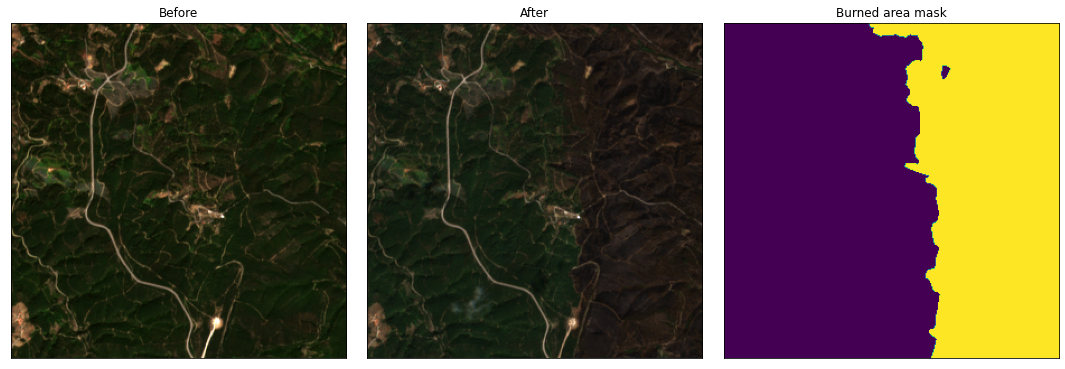

In [24]:
import numpy as np
from eolearn.core import EOPatch
from utils import plot_combo

# download from AWS S3 bucket
eop_path = "../data/eopatch_1"
eop = EOPatch.load(eop_path, lazy_loading=True)

# plot true color and reference mask
rgb = np.concatenate([eop.data["B04"], eop.data["B03"], eop.data["B02"]], axis=-1)
plot_combo(rgb, eop.mask_timeless["BURN_AREA"], brightness_factor=3.5, clip=(0, 1))

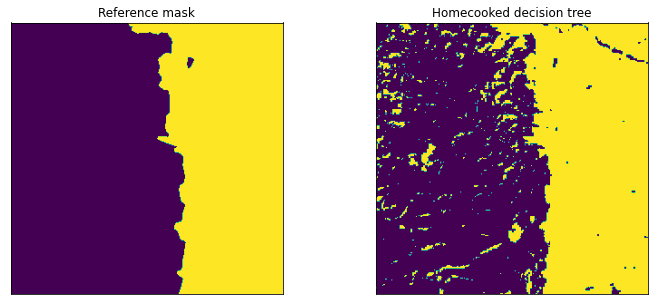

In [27]:
import matplotlib.pyplot as plt
from utils import apply_function_to_eopatch, plot_mask

# apply homecooked algo on eopatch
eop = apply_function_to_eopatch(
    eopatch=eop,
    timestamp_index=1,
    function=homecooked_decision_tree,
    output_mask_name="HOMECOOKED_DECISION_TREE",
)

# compare reference mask with our homecooked algorithm
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
plot_mask(eop.mask_timeless["BURN_AREA"], ax=axs[0], title="Reference mask")
plot_mask(
    eop.mask_timeless["HOMECOOKED_DECISION_TREE"],
    ax=axs[1],
    title="Homecooked decision tree",
)

#### Quantitative assessment

But how to best check this in a __quantitative__ way? 

We could compare how well our algorithm output `HOMECOOKED_DECISION_TREE` agrees with the reference labels `BURN_AREA`!

This can be done with the _confusion matrix_, which shows the different prediction labels compared to the different reference labels.
This way one can extract the amounts of true-positives, true-negatives, false-positives, and false-negatives.

![cm](https://miro.medium.com/max/667/1*3yGLac6F4mTENnj5dBNvNQ.jpeg)

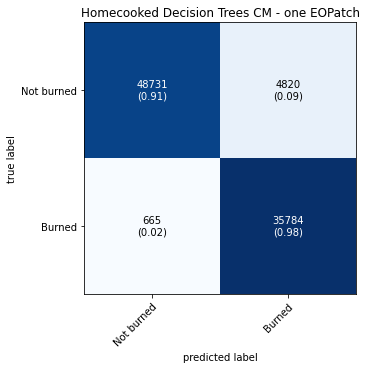

In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# extract reference and predictions
y_true = eop.mask_timeless["BURN_AREA"].ravel()
y_pred = eop.mask_timeless["HOMECOOKED_DECISION_TREE"].ravel()
cm_homecooked_eop = confusion_matrix(y_true=y_true, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))

# plot CM
plot_confusion_matrix(
    conf_mat=cm_homecooked_eop,
    show_normed=True,
    class_names=["Not burned", "Burned"],
    axis=ax,
)
ax.set_title("Homecooked Decision Trees CM - one EOPatch");

What do you think about the performance of the homecooked model?

How does it perform on the full training dataset? Do you understand the differences?

In [30]:
data = df.apply(homecooked_decision_tree, axis = 1)
data

5606138     0
2949385     0
2550676     0
2721767     0
10585791    0
           ..
1713208     1
5180599     1
10933580    1
2823255     1
3597270     1
Length: 1000000, dtype: int64

In [31]:
df

,EOPATCH,TIMESTAMP,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,BURN_AREA,NDVI,NBR
5606138,eopatch_70,2020-07-21,0.0445,0.0364,0.0628,0.0665,0.1143,0.1888,0.2206,0.2591,0.2456,0.2531,0.2524,0.1524,0,0.591523,0.259295
2949385,eopatch_8,2020-08-28,0.0066,0.0162,0.0328,0.0216,0.0580,0.1490,0.1747,0.1854,0.1913,0.1809,0.0930,0.0437,0,0.791304,0.618507
2550676,eopatch_6,2020-08-28,0.0071,0.0092,0.0392,0.0223,0.0698,0.2158,0.2586,0.2679,0.2713,0.2573,0.0871,0.0355,0,0.846313,0.765985
2721767,eopatch_1,2020-08-28,0.0094,0.0212,0.0521,0.0578,0.1114,0.1761,0.1933,0.1925,0.2238,0.2116,0.1803,0.1082,0,0.538154,0.280346
10585791,eopatch_26,2020-08-09,0.0334,0.0332,0.0539,0.0526,0.1051,0.1542,0.1918,0.1982,0.2079,0.2008,0.2637,0.1697,0,0.580542,0.077467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713208,eopatch_62,2020-07-09,0.0568,0.0650,0.0706,0.0872,0.1021,0.1072,0.1110,0.1074,0.1184,0.1214,0.2101,0.2402,1,0.103803,-0.382048
5180599,eopatch_15,2020-09-19,0.0192,0.0250,0.0284,0.0379,0.0458,0.0488,0.0486,0.0607,0.0579,0.0928,0.1174,0.1324,1,0.231237,-0.371310
10933580,eopatch_10,2020-09-19,0.0127,0.0202,0.0255,0.0383,0.0541,0.0673,0.0812,0.0802,0.0910,0.0793,0.0933,0.0719,1,0.353586,0.054569
2823255,eopatch_1,2020-09-19,0.0062,0.0137,0.0195,0.0262,0.0361,0.0488,0.0483,0.0543,0.0616,0.0976,0.0638,0.0544,1,0.349068,-0.000920


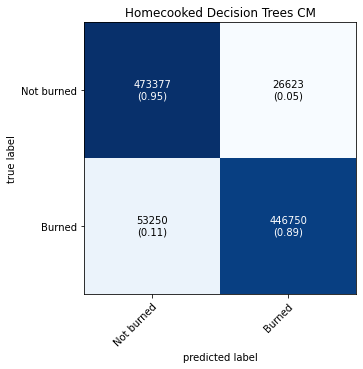

In [32]:
# apply it on the FULL dataset! using df.apply()
df["HOMECOOKED_DECISION_TREE"] = data

y_true = df["BURN_AREA"]
y_pred = df["HOMECOOKED_DECISION_TREE"]
cm_homecooked = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm_homecooked_norm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize="true")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(
    conf_mat=cm_homecooked,
    show_normed=True,
    class_names=["Not burned", "Burned"],
    axis=ax,
)
ax.set_title("Homecooked Decision Trees CM");

#### Other Evaluation Metrics

F1 score, precision, accuracy, recall, (check out `sklearn.metrics`, which has a ton of metrics).

What do they mean?

In [33]:
# import other metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(f"true-negative-rate: {cm_homecooked_norm[0,0]:.3f}")
print(f"false-positive-rate: {cm_homecooked_norm[0,1]:.3f}")
print(f"false-negative-rate: {cm_homecooked_norm[1,0]:.3f}")
print(f"true-positive-rate: {cm_homecooked_norm[1,1]:.3f}")

print(f"accuracy: {accuracy_score(y_true, y_pred):.3f}")
print(f"precision: {precision_score(y_true, y_pred):.3f}")
print(f"recall: {recall_score(y_true, y_pred):.3f}")
print(f"F1-score: {f1_score(y_true, y_pred):.3f}")

true-negative-rate: 0.947
false-positive-rate: 0.053
false-negative-rate: 0.106
true-positive-rate: 0.893
accuracy: 0.920
precision: 0.944
recall: 0.893
F1-score: 0.918


## Decision Trees

Now let's try using official tools for Decision Trees classification. 


### Train/Test Split

Before we proceed, **let's make a train/test split first.**

This is needed in order not to overfit the model to the dataset. The simplest train/test split is to just randomly split the dataset. 

Let's use a 80/20 train/test split, since this method is the simplest

_Can you think of a more appropriate method, considering we're dealing with geospatial data?_

In [43]:
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.8  # size of the training set (fraction)
df_train, df_test = train_test_split(df, train_size=TRAIN_SIZE, random_state = 42)

df_train

,EOPATCH,TIMESTAMP,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,BURN_AREA,NDVI,NBR,HOMECOOKED_DECISION_TREE,SPLIT
4842798,eopatch_49,2020-08-11,0.0488,0.0726,0.0970,0.1282,0.1447,0.1537,0.1640,0.1838,0.1875,0.1345,0.3462,0.3311,1,0.178205,-0.286075,0,Ellipsis
11299949,eopatch_28,2020-08-09,0.0275,0.0291,0.0460,0.0646,0.0751,0.0937,0.1108,0.1296,0.1330,0.1693,0.2221,0.1387,0,0.334706,-0.033917,1,Ellipsis
9599140,eopatch_4,2020-08-28,0.0095,0.0110,0.0354,0.0228,0.0690,0.1847,0.2146,0.2178,0.2318,0.2142,0.0816,0.0385,0,0.810474,0.699571,0,Ellipsis
10743811,eopatch_19,2020-09-19,0.0233,0.0292,0.0289,0.0371,0.0437,0.0503,0.0543,0.0601,0.0653,0.0591,0.1171,0.1299,1,0.236626,-0.367368,1,Ellipsis
6100041,eopatch_41,2020-06-23,0.0559,0.0602,0.0689,0.0843,0.0941,0.0967,0.1011,0.1042,0.1101,0.1129,0.1955,0.2368,1,0.105570,-0.388856,1,Ellipsis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304635,eopatch_0,2020-08-28,0.0088,0.0188,0.0428,0.0400,0.0796,0.1679,0.1901,0.2115,0.2117,0.2484,0.1445,0.0743,0,0.681908,0.480056,0,Ellipsis
10598514,eopatch_26,2020-08-09,0.0259,0.0458,0.0666,0.0900,0.1139,0.1561,0.1686,0.1853,0.1993,0.1828,0.2420,0.1469,0,0.346168,0.115593,0,Ellipsis
1501074,eopatch_54,2020-07-13,0.0200,0.0285,0.0626,0.0536,0.1217,0.2705,0.3134,0.3428,0.3573,0.2923,0.2057,0.1024,0,0.729566,0.539982,0,Ellipsis
1596619,eopatch_54,2020-08-03,0.0386,0.0375,0.0440,0.0487,0.0554,0.0563,0.0594,0.0590,0.0630,0.0746,0.1179,0.1422,1,0.095636,-0.413519,1,Ellipsis


### Training and prediction

In [44]:
df.columns

Index(['EOPATCH', 'TIMESTAMP', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07',
       'B08', 'B8A', 'B09', 'B11', 'B12', 'BURN_AREA', 'NDVI', 'NBR',
       'HOMECOOKED_DECISION_TREE', 'SPLIT'],
      dtype='object')

In [46]:
# select features to be considered
feature_columns = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07',
       'B08', 'B8A', 'B09', 'B11', 'B12']
label_column = "BURN_AREA"

# extract values
features_train, labels_train = (
    df_train[feature_columns].values,
    df_train[label_column].values,
)
features_test, labels_test = (
    df_test[feature_columns].values,
    df_test[label_column].values,
)

In [51]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf = clf.fit(features_train, labels_train)

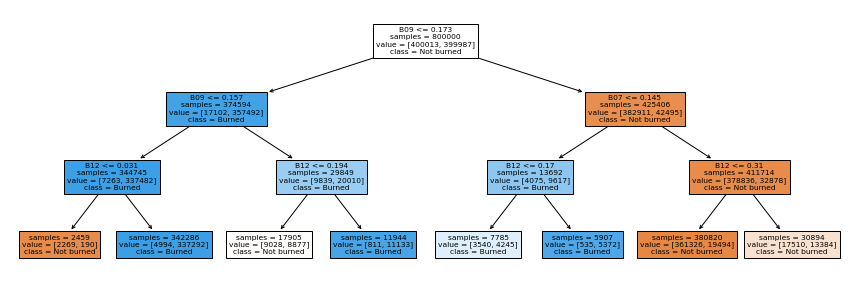

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))

# plot tree using the utility function
tree.plot_tree(
    clf,
    filled=True,
    ax=ax,
    feature_names=feature_columns,
    class_names=["Not burned", "Burned"],
    impurity=False,
);

### Evaluation

Repeating processes from before

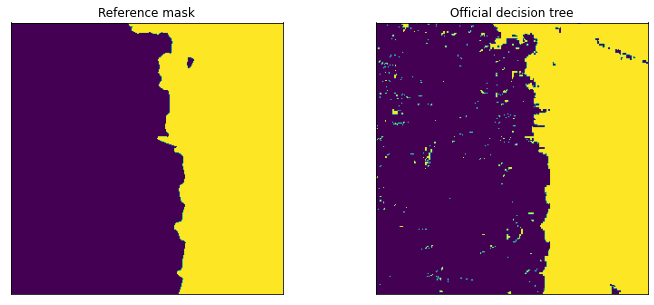

In [53]:
from utils import apply_decision_trees_to_eopatch

# copy-pasta for convenience
clf = tree.DecisionTreeClassifier(max_depth=6, random_state=42)
clf = clf.fit(features_train, labels_train)

# apply decision trees on eopatch
eop = apply_decision_trees_to_eopatch(
    eopatch=eop,
    timestamp_index=1,
    classifier=clf,
    output_mask_name="DECISION_TREE",
    features=feature_columns,
)

# compare reference mask with our homecooked algorithm
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
plot_mask(eop.mask_timeless["BURN_AREA"], ax=axs[0], title="Reference mask")
plot_mask(
    eop.mask_timeless["DECISION_TREE"],
    ax=axs[1],
    title="Official decision tree",
)

In [61]:
clf.predict(features_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

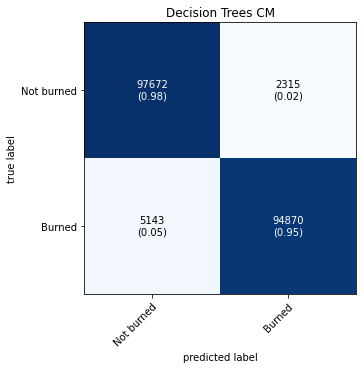

In [62]:
df_test["DECISION_TREE"] = clf.predict(features_test) #confusion matrix of the decision tree model vs our homebrewed model

y_true = df_test["BURN_AREA"].values
y_pred = df_test["DECISION_TREE"].values
cm_dt = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm_dt_norm = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize="true")

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(
    conf_mat=cm_dt, show_normed=True, class_names=["Not burned", "Burned"], axis=ax
)
ax.set_title("Decision Trees CM");

Text(0.5, 1.0, 'F1 score for different max depth of DT')

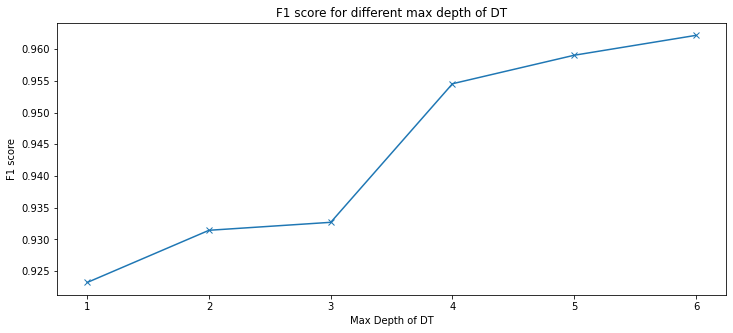

In [69]:
# calculate F1-score for multiple depths (hyper-parameter optimization)


depth_list = list(range(1, 7))
scores = []
for depth in depth_list:
    
    
    
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state=42)
    clf = clf.fit(features_train, labels_train)   
    y_true = labels_test
    y_pred = clf.predict(features_test)
    
    
    # 1. define the classifier with dynamic depth
    # 2. fit the classifier
    

    # 3. predict on test features
    
    # 4. calculate score on test
    
    score = f1_score(y_true, y_pred)
    scores.append(score)

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(depth_list, scores, "C0x-")
ax.set_xlabel("Max Depth of DT")
ax.set_ylabel("F1 score")
ax.set_title("F1 score for different max depth of DT")

In [ ]:
# calculate F1-score for multiple depths (hyper-parameter optimization) CAREFUL LONG PROCESSING TIME
depth_list = list(range(2, 42, 2))
scores_train, scores_test = [], []

for depth in depth_list:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf = clf.fit(features_train, labels_train)

    score_test = f1_score(labels_test, clf.predict(features_test))
    score_train = f1_score(labels_train, clf.predict(features_train))
    
    scores_train.append(score_train)
    scores_test.append(score_test)

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(depth_list, scores_train, "C0x-", label='F1 on Train')
ax.plot(depth_list, scores_test, "C1x-", label='F1 on Test')

ax.set_xlabel("Max Depth of DT")
ax.set_ylabel("F1 score")
ax.set_title("F1 score for different max depth of DT")

ax.legend()



## LGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms.

Pros:
* fast
* compatible with both small and large datasets
* parallelizable
* good handling of overfitting
* **tt can be exported into an evalscript and visualized in eo-browser.**

Cons:
* doesn't take spatial context into account (here neural networks would help)
* hard to interpret
* already kind of a black box

![](https://miro.medium.com/max/1000/1*qHbAsMNmdWQJkzm2SUA-8w.jpeg)

We can start with all available bands to see what we get. Later on we can adjust based on what we learned about the data / indices so far.

### Training and prediction

In [70]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()  # check definition for changing parameters!
clf.fit(features_train, labels_train, feature_name=feature_columns);

### Evaluation

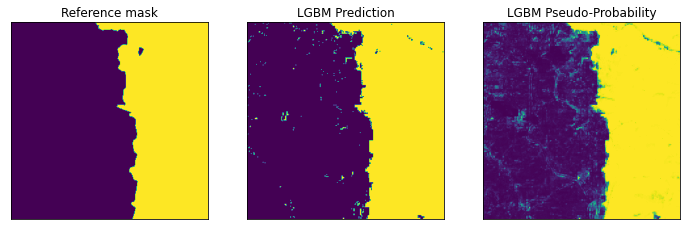

In [79]:
from utils import apply_lgbm_to_eopatch

# apply LGBM on eopatch
eop = apply_lgbm_to_eopatch(
    eopatch=eop,
    timestamp_index=1,
    classifier=clf,
    output_mask_name="LGBM",
)

# compare reference mask with our homecooked algorithm
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
plot_mask(eop.mask_timeless["BURN_AREA"], ax=axs[0], title="Reference mask")
plot_mask(
    eop.mask_timeless["LGBM"],
    ax=axs[1],
    title="LGBM Prediction",
)
plot_mask(eop.data_timeless["LGBM_PROBA"], ax=axs[2], title="LGBM Pseudo-Probability")

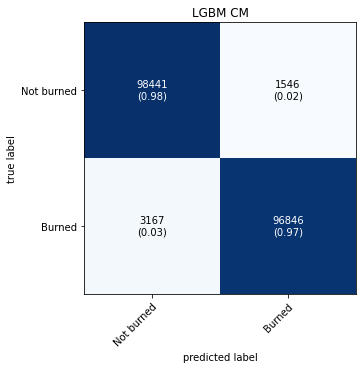

In [74]:
df_test["LGBM"] = clf.predict(features_test)

y_true = df_test["BURN_AREA"].values
y_pred = df_test["LGBM"].values
cm_lgbm = confusion_matrix(y_true=y_true, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(
    conf_mat=cm_lgbm, show_normed=True, class_names=["Not burned", "Burned"], axis=ax
)
ax.set_title("LGBM CM");

A ROC curve is a receiver operating characteristic curve. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

It can be used to show the probabilities for the classifier to predict FP or FN cases at different thresholds.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

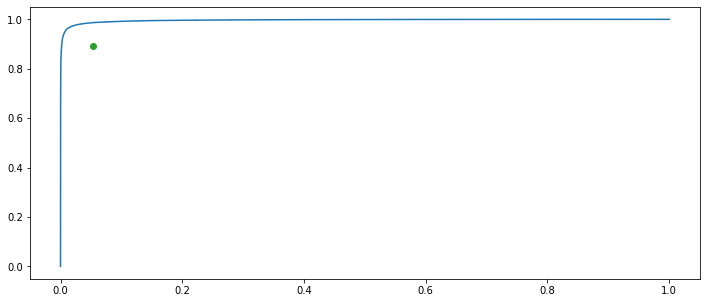

In [86]:
from sklearn.metrics import roc_curve

# copy-pasta for convenience
clf = LGBMClassifier()
clf.fit(features_train, labels_train, feature_name=feature_columns)

df_test["LGBM_PROBA"] = clf.predict_proba(features_test)[:,1]  # hint: predict_proba

y_true = df_test["BURN_AREA"].values
y_pred_proba = df_test["LGBM_PROBA"].values

fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fpr, tpr, label="ROC Curve LGBM")

# plot the homecooked point
fpr_homecooked = cm_homecooked_norm [0,1]
tpr_homecooked = cm_homecooked_norm [1,1]
ax.scatter(fpr_homecooked, tpr_homecooked, label="Homecooked Model", color="C02")

# plot the decision-tree point
fpr_dt = cm_dt[0.1]
tpr_dt =  cm_dt[1,1]
ax.scatter(fpr_dt, tpr_dt, label="Decision Trees Model", color="C03")

# ideal point
ax.scatter(0.0, 1.0, label="Ideal model", color="black", marker="X")
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate(TPR)")
ax.legend()

ax.set_xlim([-0.005, 0.4])
ax.set_ylim([0.6, 1.01]);

Plot feature importance. Does it reflect what was seen in the data?

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

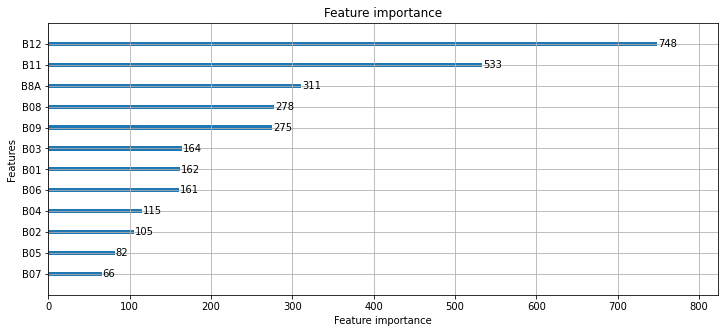

In [87]:
import lightgbm

lightgbm.plot_importance(clf, figsize=(12, 5))

### Export model to EO Browser

LGBM is just a glorified decision tree. With some helper functions and black magic it's possible to convert it into an Evalscript and visualize it in the EO Browser. 

In [88]:
import joblib

model_file = "wildfires_example_model.pkl"
evalscript_file = "wildfires_example_model_evalscript.js"

joblib.dump(clf, model_file)

# convert and export to evalscript - bash command
! python convert-model-to-custom-script.py --model $model_file --output $evalscript_file

Paste it to EO Browser!

https://sentinelshare.page.link/g4vL

What can you see?
* Does the visualization reflect the quality as indicated by the scores?
* Does it generalize well across different areas?
* Does it generalize well across different years?


Now it's time to play around and try to improve the model. Some ideas to get you started:
* We made a random train/test split. Is this the best we can do?
* Would adding indices (NDVI, NBR) to the features improve it?
* We used default LGBM parameters, hyper parameter optimization could be one of the things to try.
* Feel free to explore your own ideas.